<h1>House Price</h1>
<p>In this notebook i conducted a brief data analysis and used multiple models then choosed the best one<p/>
<h3>Columns</h3>
<ul>
    <li>Longitude</li>
    <li>Latitude</li>
    <li>Housing Median Age</li>
    <li>Total rooms</li>
    <li>Total Bedrooms</li>
    <li>Population</li>
    <li>Households</li>
    <li>Median income</li>
    <li>Median House Value</li>
    <li>Ocean Proximity</li>
</ul>

<h6>Importing Libraries</h6>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use("ggplot")
pd.set_option("display.max_columns", 200)
from sklearn.model_selection import train_test_split


#models
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

<h6>Reading the data into a dataframe</h6>

In [2]:
df = pd.read_csv("housing.csv")

df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

<h6>Checking the columns</h6>

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<h6>Checking the shape to know the number of rows and columns</h6>

In [4]:
df.shape

(20640, 10)

<h6>Getting basic info from the dataset to know the data types we have</h6>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<h6>Getting the basic stats from the dataset</h6>

In [6]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

<h6>Looking for null values</h6>

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

<h6>Subsetting the "Ocean Proximity"</h6>
<p>Getting the unique values</p>

In [8]:
df["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

<h6>Checking for duplicates</h6>

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

<h6>Since all the columns are non numerical we take only the numerical columns for statistical analysis</h6>

In [11]:
numeric_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value']

<h2>Plotting a histogram to understand the distribution of all numerical colums</h2>

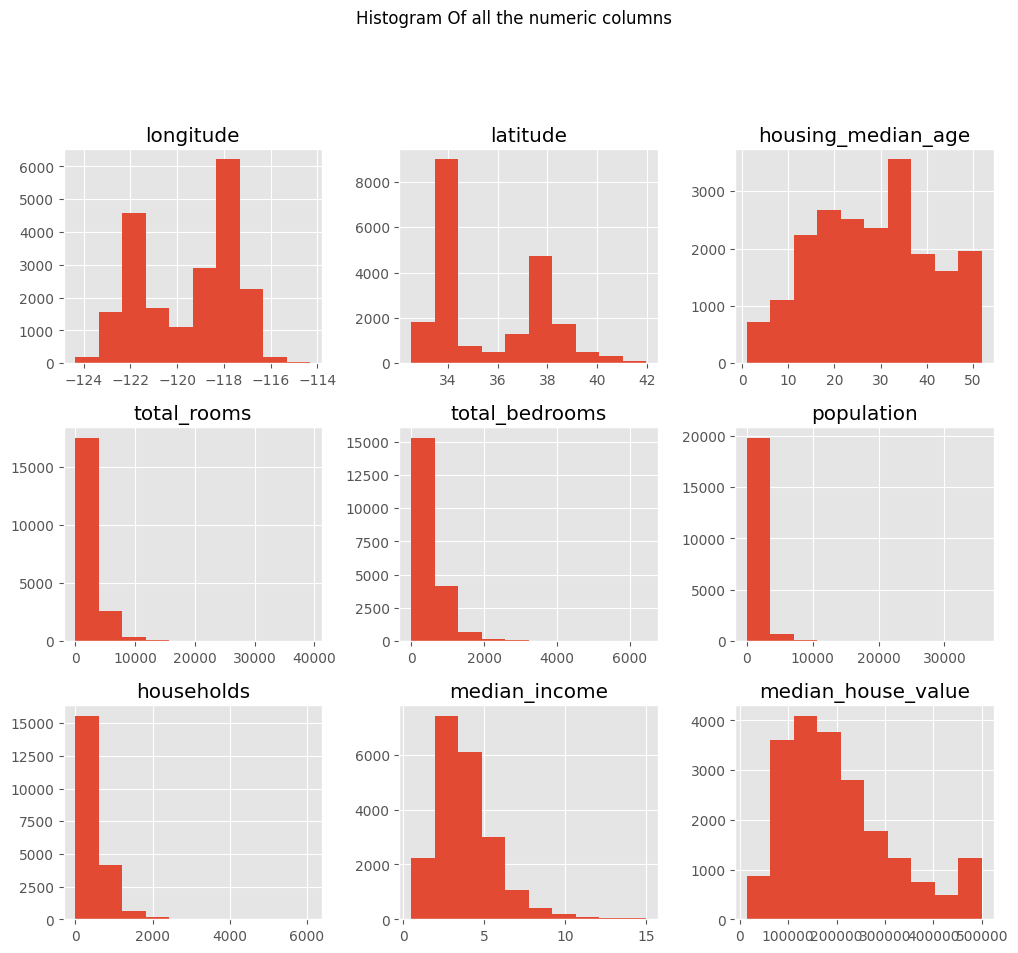

In [12]:
df[numeric_cols].hist(figsize=(12,10))
plt.suptitle("Histogram Of all the numeric columns", y=1.02)
plt.show()

<H6>BOX PLOTS</H6>

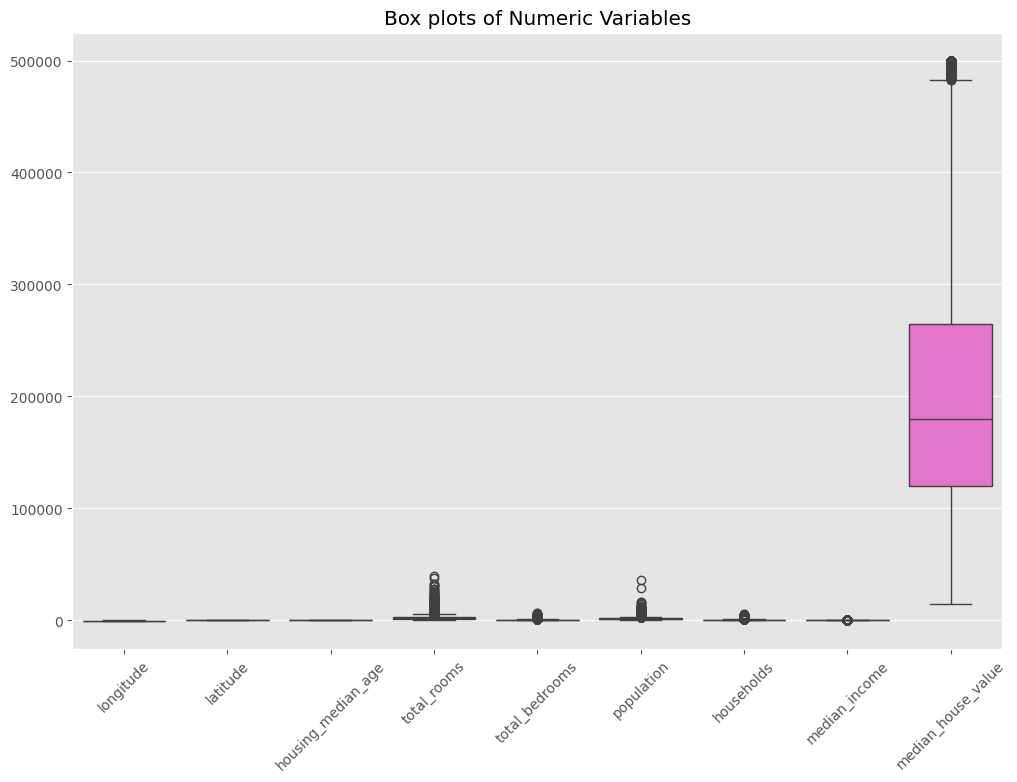

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[numeric_cols])
plt.title('Box plots of Numeric Variables')
plt.xticks(rotation=45)
plt.show()

<h6>Scatter Plot is used to visualize relationship between data</h6>

<Figure size 1200x800 with 0 Axes>

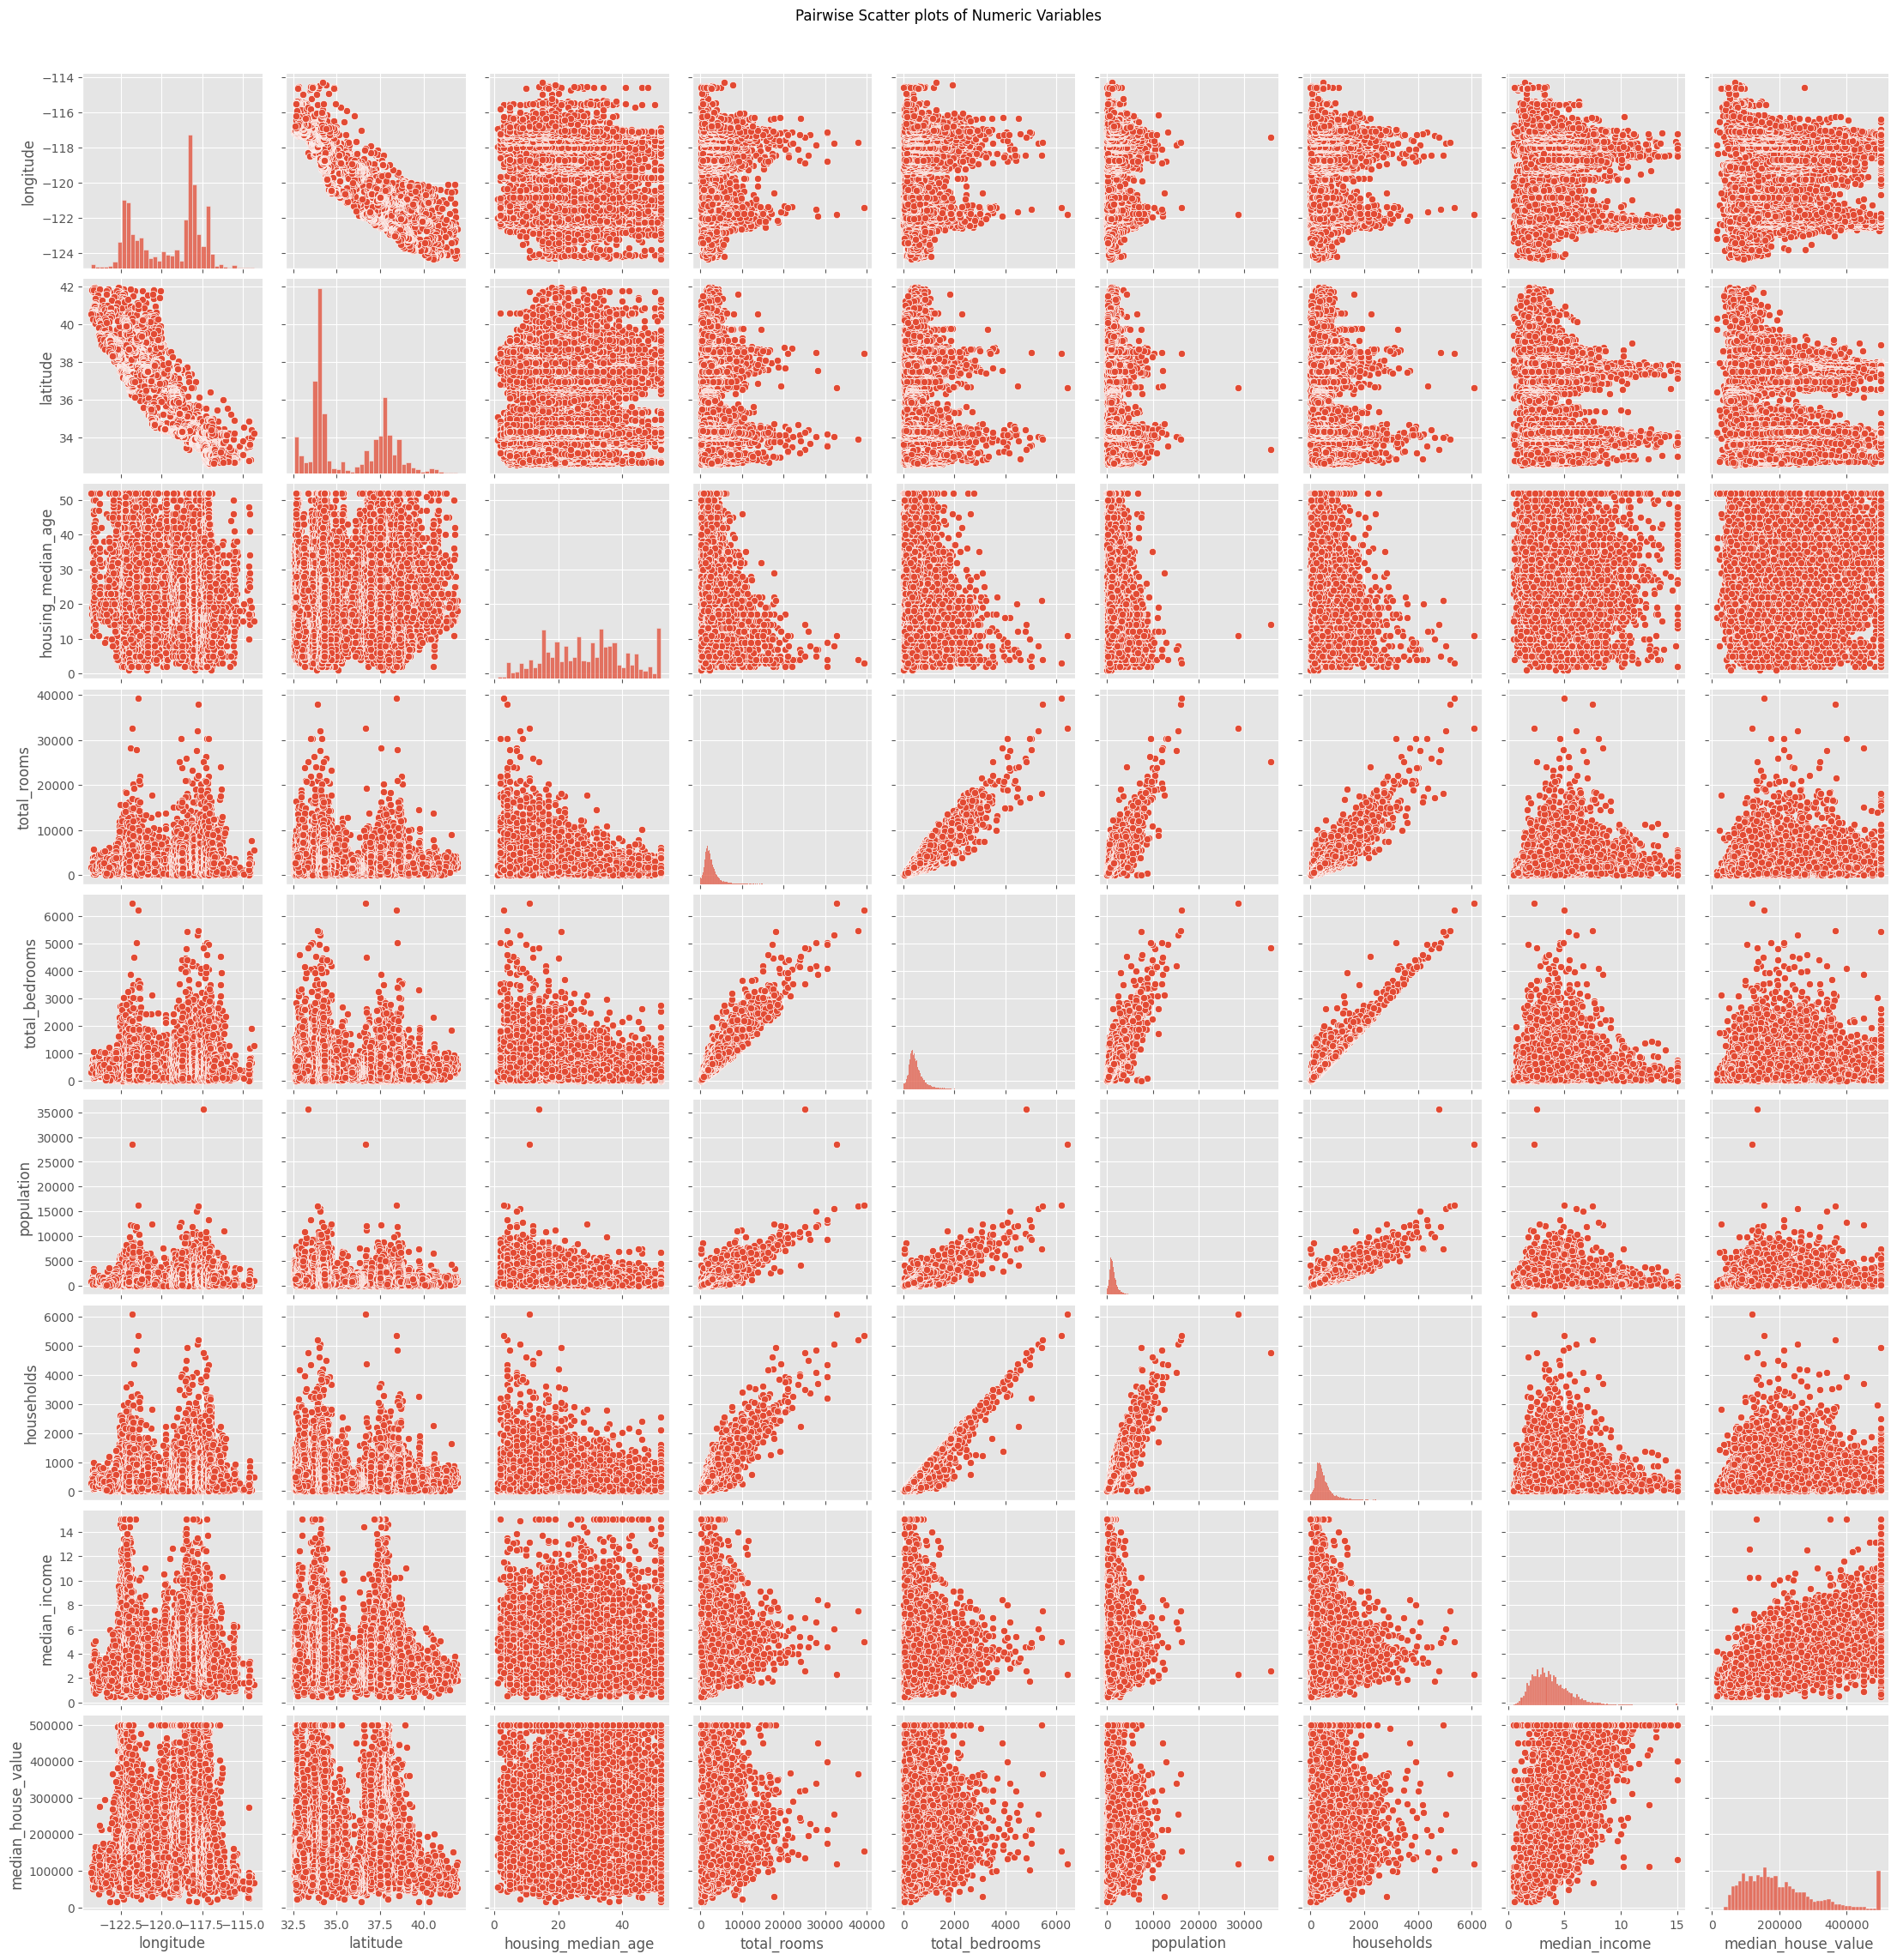

In [14]:
plt.figure(figsize=(12, 8))
sns.pairplot(df[numeric_cols])
plt.suptitle('Pairwise Scatter plots of Numeric Variables', y=1.02)
plt.show()

<H4>Correlation Matrix</H4>

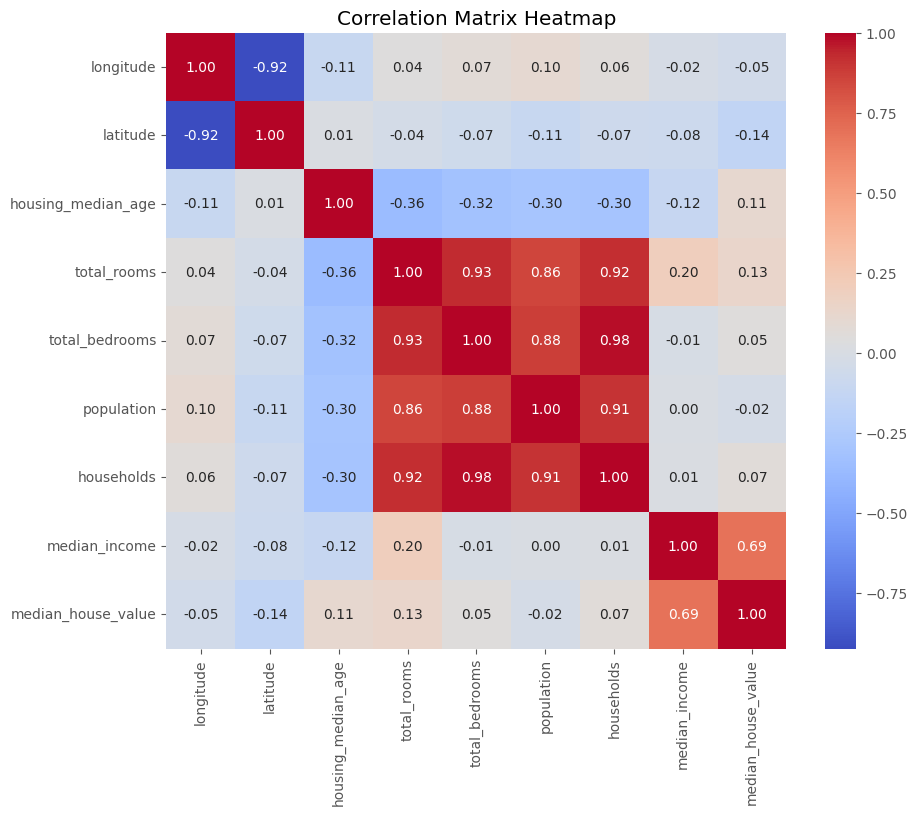

In [15]:
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

<H6>Scatter plots of numeric features against the target variable</H6>

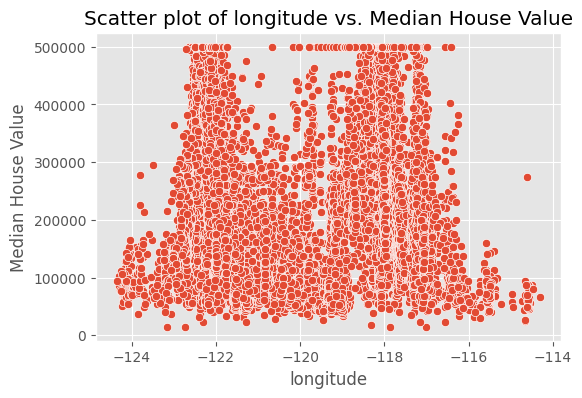

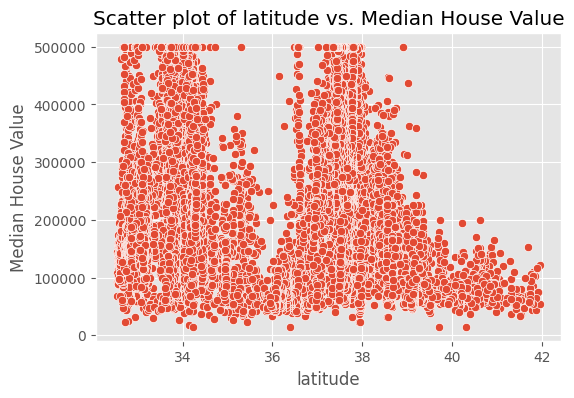

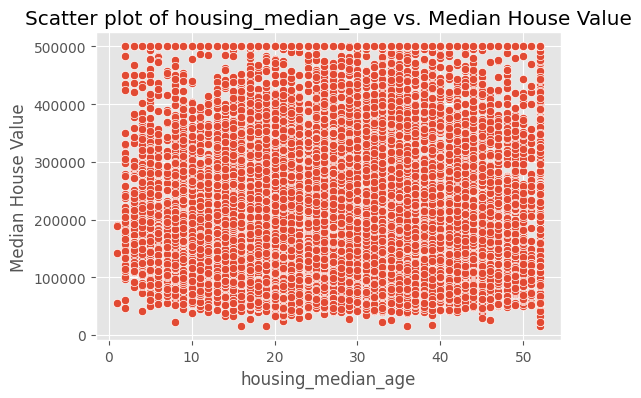

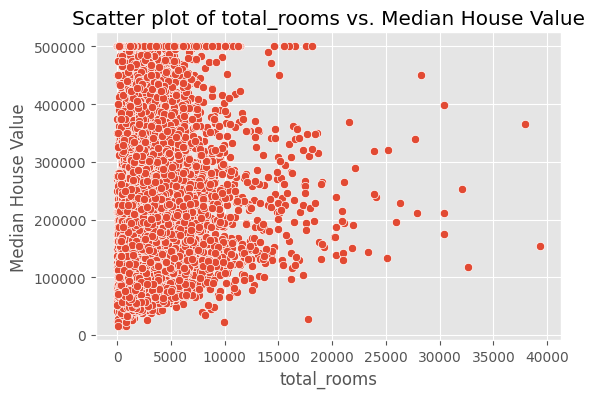

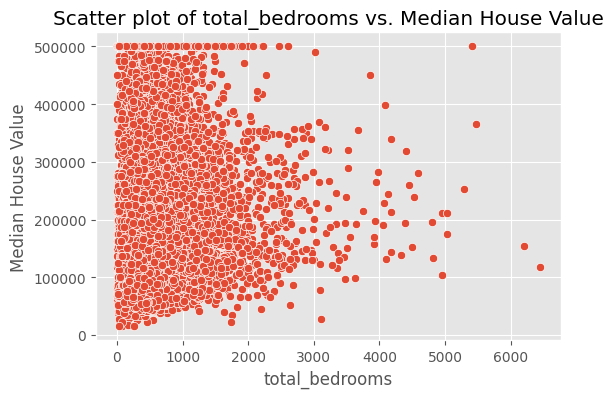

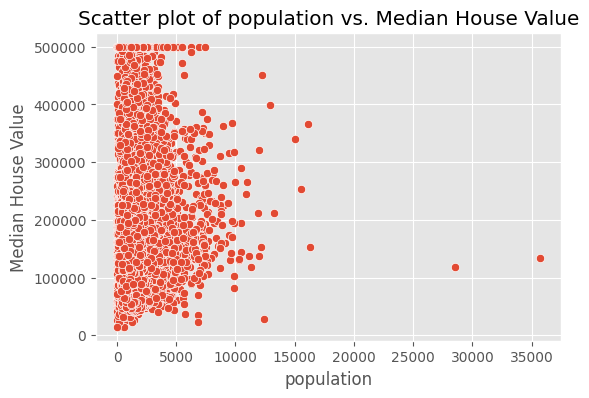

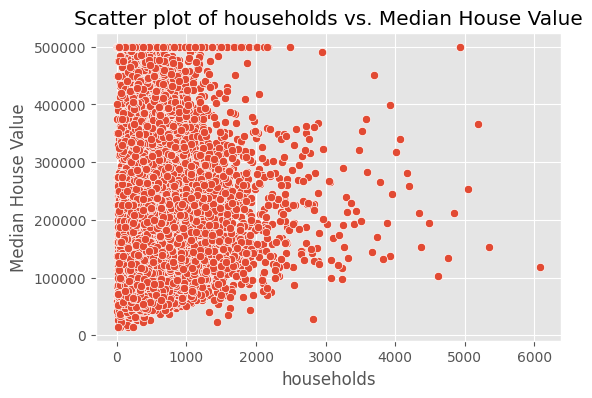

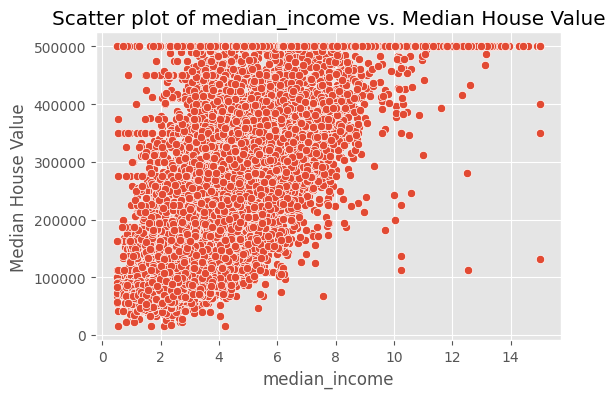

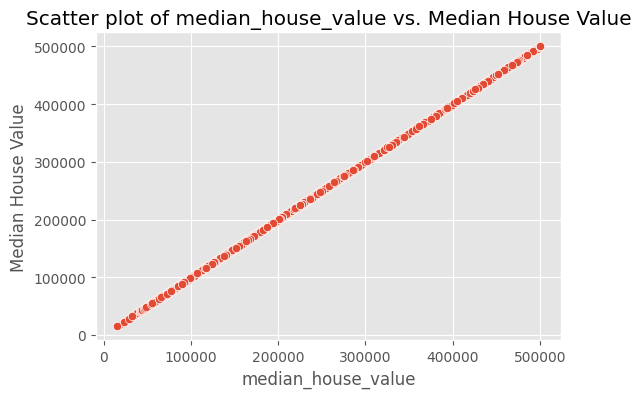

In [16]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=col, y='median_house_value', data=df)
    plt.title(f'Scatter plot of {col} vs. Median House Value')
    plt.xlabel(col)
    plt.ylabel('Median House Value')
    plt.show()

<h4>Calculating correlation coefficients</h4>

In [17]:
correlation_coeffs = df[numeric_cols].corrwith(df['median_house_value'])

print("Correlation coefficients with 'median_house_value':")
print(correlation_coeffs)

Correlation coefficients with 'median_house_value':
longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
dtype: float64


In [18]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  median_house_value  \
0           322.0       126.0         8.3252            452600.0   
1          2401.0      1138.0         8.3014            358500.0   
2           496.0       177.0         7.2574            352100.0   
3           558.0       219.0         5.6431            341300.0   
4           565.0       259.0         3.8462            342200.0   
...           ...         ...            ...                 ...   
20635       845.0       330.0         1.5603             78100.0   
20636       356.0       114.0         2.5568             77100.0   
20637      1007.0       433.0         1.7000             92300.0   
20638       741.0       349.0         1.8672             84700.0   
20639      1387.0       530.0         2.3886             89400.0   

      ocean_proximity  
0            NEAR BAY  
1            NEAR BAY  
2            NEAR BAY  
3            NEAR BAY  
4            NEAR BAY  
...               ...  
20635          INLAND  
20636          INLAND  
20637          INLAND  
20638          INLAND  
20639          INLAND  

[20640 rows x 10 columns]

<h2>Preprocessing the data</h2>

In [3]:
#splitting the dataset

X = df.drop("median_house_value", axis=1)
y = df["median_house_value"]

In [4]:
X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income ocean_proximity  
0           322.0       126.0         8.3252        NEAR BAY  
1          2401.0      1138.0         8.3014        NEAR BAY  
2           496.0       177.0         7.2574        NEAR BAY  
3           558.0       219.0         5.6431        NEAR BAY  
4           565.0       259.0         3.8462        NEAR BAY  
...           ...         ...            ...             ...  
20635       845.0       330.0         1.5603          INLAND  
20636       356.0       114.0         2.5568          INLAND  
20637      1007.0       433.0         1.7000          INLAND  
20638       741.0       349.0         1.8672          INLAND  
20639      1387.0       530.0         2.3886          INLAND  

[20640 rows x 9 columns]

In [5]:
X["total_bedrooms"].isnull().sum()

207

<p>Here i will fill in the missing values with the mean value of the column, using the fillna() method</p>

In [6]:
X["total_bedrooms"] = X["total_bedrooms"].fillna(X["total_bedrooms"].mean())

In [7]:
X.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
dtype: int64

<h7>Using get dummies method in pandas to convert the non-numerical column into binary classes {0,1}</h7>

In [8]:
encoded_X = pd.get_dummies(X, columns=['ocean_proximity'])

In [9]:
encoded_X

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  ocean_proximity_<1H OCEAN  \
0           322.0       126.0         8.3252                          0   
1          2401.0      1138.0         8.3014                          0   
2           496.0       177.0         7.2574                          0   
3           558.0       219.0         5.6431                          0   
4           565.0       259.0         3.8462                          0   
...           ...         ...            ...                        ...   
20635       845.0       330.0         1.5603                          0   
20636       356.0       114.0         2.5568                          0   
20637      1007.0       433.0         1.7000                          0   
20638       741.0       349.0         1.8672                          0   
20639      1387.0       530.0         2.3886                          0   

       ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                           0                       0   
1                           0                       0   
2                           0                       0   
3                           0                       0   
4                           0                       0   
...                       ...                     ...   
20635                       1                       0   
20636                       1                       0   
20637                       1                       0   
20638                       1                       0   
20639                       1                       0   

       ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                             1                           0  
1                             1                           0  
2                             1                           0  
3                             1                           0  
4                             1                           0  
...                         ...                         ...  
20635                         0                           0  
20636                         0                           0  
20637                         0                           0  
20638                         0                           0  
20639                         0                           0  

[20640 rows x 13 columns]

<h6>building the model</h6>
<p>Splitting our data into training and testing data, as a rule of thumb i used 80% as training data and 20% as testing data, 75% and 25% can also be used</p>

<h3>The Goal is to build multiple models and select the best performers then proceed to perform dimensionality reduction and model validation</h3>


<h2>Support Vector Regressor</h2>

In [11]:
#Converting the dependent and independent features to an array
encoded_X = encoded_X.values
y = y.values

# Splitting the dataset into train and test data


X_train, X_test, y_train, y_test = train_test_split(encoded_X, y,
                                                    test_size=0.2,
                                                    random_state=0)

# Support vector machine always take scaled features so i scalled the feature

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

# Fit and transform X_train
X_train = sc_X.fit_transform(X_train)

# Only transform X_test (never fit on test data)
X_test = sc_X.transform(X_test)

# Fit and transform y_train
y_train = sc_y.fit_transform(y_train.reshape(-1, 1))

# Instantiatiating the model
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)

# Make predictions on the scaled test data and then inverse transform to get original scale

y_pred = regressor.predict(X_test)

# since the data was scaled we have transform it back
y_pred = sc_y.inverse_transform(y_pred.reshape(-1,1))

# scoring the model
from sklearn.metrics import r2_score

score_svr = r2_score(y_test,y_pred)
print(score_svr)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7563026066784136


<H2>Multiple Linear Regression </h2>

In [12]:
# splitting the data into train and test sets


X_train, X_test, y_train, y_test = train_test_split(encoded_X,y,
                                                   test_size=0.2,
                                                   random_state=0)

# instantiating the model object
linear_regressor = LinearRegression()
#fitting the data into the model
linear_regressor.fit(X_train, y_train)

# predicting on the test data
y_pred_mult = linear_regressor.predict(X_test)

# scoring the model
score_multi_linear = r2_score(y_test,y_pred_mult)
print(score_multi_linear)

0.6381617983930387


<h4>Polynomial Regression</h4>

In [13]:
# splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(encoded_X,y,
                                                   test_size=0.2,
                                                   random_state=0)

# Training the polynomial Regression model on training set

# instantiating the model to a degree of 2
poly_reg = PolynomialFeatures(degree=2)

# transforming the data the data into a polynomial
X_poly = poly_reg.fit_transform(X_train)

#Instantiating the model
poly_regressor = LinearRegression()

#Fitting the model
poly_regressor.fit(X_poly, y_train)

#Predicting the test set
y_pred = poly_regressor.predict(poly_reg.transform(X_test))

# Scoring the model
score_poly = r2_score(y_test, y_pred)
print(score_poly)

0.692335355299516


<h6>Decision Tree</h6>

In [14]:
# testing the data
X_train, X_test, y_train, y_test = train_test_split(encoded_X,y,
                                                   test_size=0.2,
                                                   random_state=0)


# instantiating the model
decision_regressor = DecisionTreeRegressor(random_state=0)

#Fitting the model
decision_regressor.fit(X_train,y_train)

#Predicting the test set
y_pred = decision_regressor.predict(X_test)

#scoring the model
score_decision = r2_score(y_test,y_pred)
score_decision

0.6440202768542989

<h6> Random Forest </h6>

In [15]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(encoded_X,y,
                                                   test_size=0.2,
                                                   random_state=0)

#Instantiating the model with 10 estimators
random_regressor = RandomForestRegressor(n_estimators=20,
                                        random_state=0)

# fitting the data
random_regressor.fit(X_train, y_train)

#predicting on the test set
y_pred = random_regressor.predict(X_test)

#scoring the model
score_randomForest = r2_score(y_test, y_pred)
print(score_randomForest)

0.8103676394298766


<h3>XGBOOST</h3>

In [16]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(encoded_X,y,
                                                   test_size=0.2,
                                                   random_state=0)

#Instantiating the model
regressor = XGBRegressor()
#fitting the model
regressor.fit(X_train, y_train)

# predicting the test set
y_pred = regressor.predict(X_test)

# scoring the model
score_XGBOOST = r2_score(y_test,y_pred)
print(score_XGBOOST)

0.8383843951127946


<h2>Comparing the model</h2>

In [17]:
models = pd.DataFrame({
    "Models": ["Support Vector Regression","Multi-Linear Regression", "Polynomial Regression",
              "DecisionTree Regression", "RandomForest Regressor", "XGBOOST"],
    "Score": [score_svr,score_multi_linear, score_poly, score_decision,score_randomForest,score_XGBOOST]
})

models.sort_values(by="Score",ascending=False)

Models     Score
5                    XGBOOST  0.838384
4     RandomForest Regressor  0.810368
0  Support Vector Regression  0.756303
2      Polynomial Regression  0.692335
3    DecisionTree Regression  0.644020
1    Multi-Linear Regression  0.638162

<p>Let's visualize the the comparisons</p>

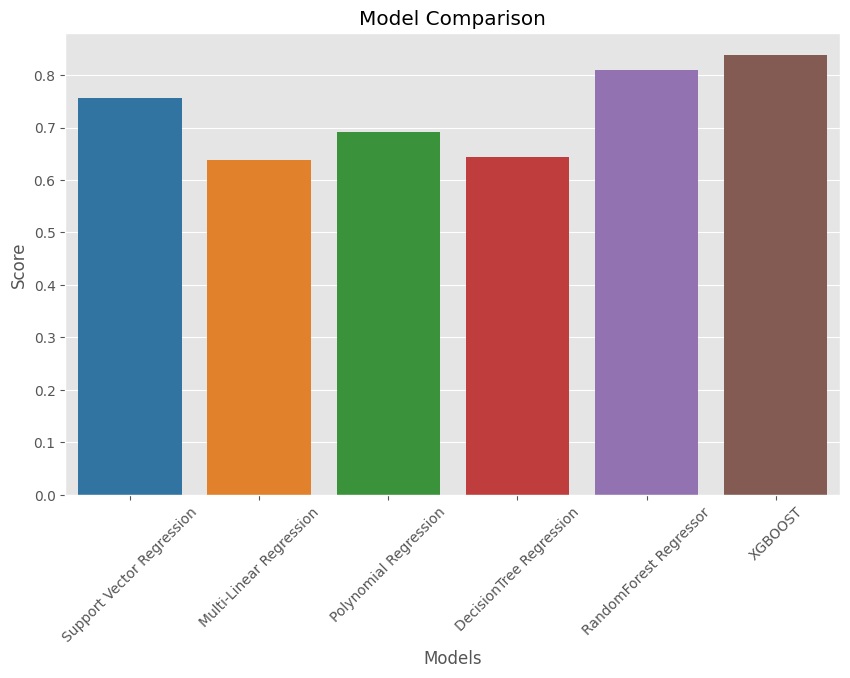

In [18]:


# Set figure size
plt.figure(figsize=(10, 6))

# Define custom color palette
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b"]

# Create bar plot with custom palette and larger font size
sns.barplot(x=models['Models'], y=models['Score'], hue=models['Models'], palette=colors, dodge=False)

# Set plot title and labels
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Score')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


<p>Now we can clearly see that the XGBOOST has the highest score followed by Randome forest. So now we will focus on improving these two models and choose the best out of them.</p>
<h2>What we will do</h2>
<ul>
<li>GridSearch Hyperparameter Tunning to improve the model</li>
<li>Model evaluation</li>
</ul>

In [19]:
# Hyperparameter Tunning

X_train, X_test, y_train, y_test = train_test_split(encoded_X,y,
                                                   test_size=0.2,
                                                   random_state=0)

from sklearn.model_selection import GridSearchCV

# Define the RandomForestRegressor
rf = RandomForestRegressor()

# Define the hyperparameters grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters for randomforest:", grid_search.best_params_)


Best hyperparameters for randomforest: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [20]:

# Define the XGBoost regressor
xgb_reg = XGBRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Perform grid search with cross-validation
grid_search_x = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='r2')
grid_search_x.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters for xgb:", grid_search_x.best_params_)


Best hyperparameters for xgb: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'subsample': 0.9}


<h4>Working with the best scores</h4>

In [21]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(encoded_X,y,
                                                   test_size=0.2,
                                                   random_state=0)
best_randomF = RandomForestRegressor(n_estimators=400,
                                     max_depth=None,
                                     min_samples_split=2,
                                     min_samples_leaf=2)
# fitting the model with the best param
best_randomF.fit(X_train,y_train)

# predicting the model
y_pred = best_randomF.predict(X_test)

# scoring the model
best_score_randomF = r2_score(y_test,y_pred)
print(best_score_randomF)

0.8262727159023799


In [34]:
# splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(encoded_X,y,
                                                   test_size=0.2,
                                                   random_state=0)

#Instantiating the model
best_regressor = XGBRegressor(colsample_bytree=0.8,
                              learning_rate=0.1,
                              max_depth=7,
                              min_child_weight=1,
                              subsample=0.9,
                              n_estimators=400
                              )
#fitting the model
best_regressor.fit(X_train, y_train)

# predicting the test set
y_pred = best_regressor.predict(X_test)

# scoring the model
best_score_XGBOOST = r2_score(y_test,y_pred)
print(best_score_XGBOOST)

0.8533855266091804


<h3> Model Evaluation</h3>

In [35]:

rf_cross_val = cross_val_score(estimator = best_randomF, X = X_train, y = y_train, cv = 10, scoring="r2")
print("Score: {:.2f} %".format(rf_cross_val.mean()*100))
print("Standard Deviation: {:.2f} %".format(rf_cross_val.std()*100))

Accuracy: 81.99 %
Standard Deviation: 1.44 %


In [36]:

xgb_cross_val = cross_val_score(estimator = best_regressor, X = X_train, y = y_train, cv = 10, scoring="r2")
print("Score: {:.2f} %".format(xgb_cross_val.mean()*100))
print("Standard Deviation: {:.2f} %".format(xgb_cross_val.std()*100))

Score: 83.98 %
Standard Deviation: 1.21 %


<p>As we can see the XGBOOST outperforms Random Forest which was the closest competitor, please you are welcome to improve it by trying other forms of preprocessing and trying other models that i did not cover</p>